# Neural Network

## Previous Chapter Code

In [1]:
# Download Data
import torch
import numpy as np
from torchvision import datasets

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True)

# constant for classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

x = train_dataset.data
y = train_dataset.targets

### New code
# Reshape and cast the input data
x = x.view(-1, 784)
x = x.to(torch.float32)

# Cast the target labels to the 'long' data type
y = y.to(torch.long)
###

# Split data into train & valid set
from sklearn.model_selection import train_test_split

valid_pct = .2
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = valid_pct)

# Normalization
def min_max_scale(data, a=0, b=1):
    # Calculate the minimum and maximum values of the data
    data_min = data.min()
    data_max = data.max()

    # Perform Min-Max Scaling
    data_norm = (data - data_min) / (data_max - data_min)

    # Rescale the data to the [a, b] range
    data_norm = a + data_norm * (b - a)

    return data_norm

x_train_norm = min_max_scale(x_train)
x_valid_norm = min_max_scale(x_valid)

# Load data
from torch.utils.data import TensorDataset, DataLoader

def load_data(x_tensor, y_tensor, batch_size, test):
    data = TensorDataset(x_tensor, y_tensor)

    data_loader = DataLoader(data, batch_size=batch_size, shuffle=not test, drop_last=not test)

    print(f"Total Mini-Batches: {len(data_loader)}")
    for i, (x, y) in enumerate(data_loader):
        if i == 0:
            print(f"Shape of Each Mini-Batch: {x.shape}")
            print("")
            break
    return data_loader

batch_size = 128
train_loader = load_data(x_train_norm, y_train, batch_size=batch_size, test = False)
valid_loader = load_data(x_valid_norm, y_valid, batch_size=batch_size, test=True)

Total Mini-Batches: 375
Shape of Each Mini-Batch: torch.Size([128, 784])

Total Mini-Batches: 94
Shape of Each Mini-Batch: torch.Size([128, 784])



Trong đoạn mã trên, tôi đã bổ sung một đoạn code đã được dùng nhiều lần ở chương trước để tiến hành việc thay đổi kích thước của biến x, đồng thời thay đổi kiểu dữ liệu (dtype) cho cả x và y. Những thay đổi này được thêm vào để tránh việc lặp lại các bước này khi đang huấn luyện mô hình.

Trong mạng neural (neural network), có hai khái niệm quan trọng cần được nhắc đến đó là:

+ **Hidden Layer (Fully Connected Layer)**

+ **Activation Function** 

## Hidden Layer

> Fully connected Layer

<img src="./Images/Linear.png" alt="Simple Neural Network" style="width: 550px;"/>

Đây là hình ảnh của một **mạng neural đơn giản**, hay có thể gọi là **Linear Layer**, mà chúng ta đã thảo luận trong chương trước. Trong hình ảnh này, mạng neural đơn giản được minh họa với 5 đầu vào và 3 đầu ra. Tuy nhiên, trong trường hợp dữ liệu Fashion MNIST mà chúng ta đang xem xét, thực tế là có 784 đầu vào và 10 đầu ra. Đây chỉ là một ví dụ minh họa để giúp chúng ta hiểu cách mạng neural hoạt động. 

<img src="./Images/DeepNeuralNetwork.png" alt="Deep Neural Network" style="width: 550px;"/>

Mạng Nơ-ron bao gồm các lớp ẩn (hidden layer) nằm giữa lớp đầu vào và lớp đầu ra. Trong hình ảnh này, có 3 lớp ẩn, mỗi lớp ẩn bao gồm 5 units (biểu tượng bởi các hình tròn trong hình). Trong khi đó, Linear Layer mà chúng ta đã thảo luận trong chương trước được xem như không có lớp ẩn và không có đơn vị (units) nằm ở các lớp ẩn.

Ở đây, khi một unit được kết nối với tất cả các units ở lớp trước đó, chúng ta có thuật ngữ là Fully Connected Layer (Lớp Kết Nối Đầy Đủ).

Trong thực tế, quyết định có bao nhiêu lớp hidden layer và mỗi lớp ẩn có bao nhiêu đơn vị là hoàn toàn linh hoạt và phụ thuộc vào bài toán cụ thể bạn đang giải quyết. Điều quan trọng là bạn cần xác định rõ lớp đầu vào và lớp đầu ra. Ví dụ, trong Fashion MNIST, lớp đầu vào luôn có 784 đơn vị và lớp đầu ra luôn có 10 đơn vị để phù hợp với dữ liệu.

## Activation Function

<img src="./Images/ActivationFunction.png" alt="ActivationFunction" style="width: 650px;"/>

Hàm kích hoạt (activation function) trong mạng neural là một yếu tố quan trọng quyết định cách mỗi neuron hoặc nút (node) trong mạng phản ứng và truyền giá trị đến các neuron trong lớp tiếp theo. Hàm kích hoạt giúp mạng neural học và biểu diễn các mô hình phức tạp, đặc biệt là các mô hình phi tuyến tính.

Trong mạng neural, hầu hết các unit hay nút (node) ở các lớp ẩn (hidden layer) đều cần phải đi qua hàm activation, trong khi các unit ở lớp đầu vào (input layer) và lớp đầu ra (output layer) thường không cần sử dụng hàm activation.

Có một số hàm activation function phổ biến được sử dụng trong deep learning, bao gồm:

- Sigmoid

- ReLu (Rectified Linear Unit)

- Softmax

In [2]:
import torch

example = torch.tensor([4., -100., -3., 100.])

sigmoid_result = torch.sigmoid(example)
sigmoid_result

tensor([0.9820, 0.0000, 0.0474, 1.0000])

**Sigmoid**: Hàm kích hoạt này là một hàm đơn giản biến đổi mọi số thành giá trị nằm trong khoảng từ 0 đến 1.

In [3]:
example = torch.tensor([4., -100., -3., 100.])

relu_result = torch.relu(example)
relu_result

tensor([  4.,   0.,   0., 100.])

**ReLU (Rectified Linear Unit)** là một hàm đơn giản với công thức f(x) = max(0, x), nghĩa là nó chuyển đổi mọi giá trị âm thành 0 và giữ nguyên giá trị dương.

In [4]:
example = torch.tensor([4., -100., -3., 100.])

softmax_result = torch.softmax(example, dim=0)

# Print the values of the tensor with decimal formatting
print(softmax_result)
for value in softmax_result:
    print(f'{value:.2f}')

tensor([2.0305e-42, 0.0000e+00, 1.4013e-45, 1.0000e+00])
0.00
0.00
0.00
1.00


**Softmax** là một hàm kích hoạt (activation function) được sử dụng trong mạng neural để biến đổi một tensor thành một phân phối xác suất, tức là nó chuyển đổi mọi giá trị trong tensor sao cho tổng của chúng bằng 1.

Thông thường, **ReLU** là một hàm activation function phổ biến được sử dụng trong các lớp ẩn (hidden layers) của mạng neural. Vì vậy, trong mô hình của mình, tôi sẽ lựa chọn sử dụng ReLU như một hàm kích hoạt cho các lớp ẩn của mạng neural. 

## Altogether

In [5]:
def train_model(train_loader, valid_loader, loss_fn, \
                optimizer_algorithm, lr, n_epochs):
    
    # Assume 3 hidden layers, each with 200 units
    weight_input = torch.randn(784, 200, requires_grad=True)
    bias_input = torch.zeros(200, requires_grad=True)
    
    weight_hd1 = torch.randn(200, 200, requires_grad=True)
    bias_hd1 = torch.zeros(200, requires_grad=True)
    
    weight_hd2 = torch.randn(200, 200, requires_grad=True)
    bias_hd2 = torch.zeros(200, requires_grad=True)
    
    weight_hd3 = torch.randn(200, 10, requires_grad=True)
    bias_hd3 = torch.zeros(10, requires_grad=True)
    
    parameters = [weight_input, bias_input, weight_hd1, bias_hd1, \
                  weight_hd2, bias_hd2, weight_hd3, bias_hd3]
    
    # Get the optimizer function based on the provided algorithm name
    opt_fn = getattr(torch.optim, optimizer_algorithm)
    optimizer = opt_fn(parameters, lr=lr)

    # Lists to store losses and training accuracy
    losses = torch.zeros(n_epochs, len(train_loader))
    train_acc = torch.zeros(n_epochs, len(train_loader))
    valid_acc = torch.zeros(n_epochs, len(valid_loader))

    for epoch in range(n_epochs):
        for i, (x, y) in enumerate(train_loader):
            
            # Forward pass
            hd1 = x @ weight_input + bias_input
            hd1 = torch.relu(hd1)
            
            hd2 = hd1 @ weight_hd1 + bias_hd1
            hd2 = torch.relu(hd2)
            
            hd3 = hd2 @ weight_hd2 + bias_hd2
            hd3 = torch.relu(hd3)
            
            out = hd3 @ weight_hd3 + bias_hd3
            
            # Calculate loss
            loss = loss_fn(out, y)

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Store the loss
            losses[epoch, i] = loss.item()

            # Calculate training accuracy
            acc = 100 * (out.argmax(1) == y).float().mean()
            train_acc[epoch, i] = acc

            # Evaluation on validation data
            with torch.no_grad():
                for j, (x, y) in enumerate(valid_loader):
                    hd1 = x @ weight_input + bias_input
                    hd1 = torch.relu(hd1)

                    hd2 = hd1 @ weight_hd1 + bias_hd1
                    hd2 = torch.relu(hd2)

                    hd3 = hd2 @ weight_hd2 + bias_hd2
                    hd3 = torch.relu(hd3)

                    out = hd3 @ weight_hd3 + bias_hd3
                    
                    acc = 100 * (out.argmax(1) == y).float().mean()
                    valid_acc[epoch, j] = acc

    return parameters, losses, train_acc, valid_acc

Trong đoạn code trên, tôi sử dụng một kiến trúc mạng neural (neural network architecture) với 3 lớp ẩn (hidden layer), mỗi lớp ẩn bao gồm 200 units.

In [6]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Assume 3 hidden layers, each with 200 units
        self.input = nn.Linear(784, 200)
        self.hd1 = nn.Linear(200, 200)
        self.hd2 = nn.Linear(200, 200)
        self.hd3 = nn.Linear(200, 10)
        
        self.layers = [self.input, self.hd1, self.hd2]

    def forward(self, x):
        # Forward pass
        for layer in self.layers:
            x = layer(x)
            # Apply ReLU Activation Function
            x = torch.relu(x)
            
        out = self.hd3(x)
        
        return out

def train_model(model, train_loader, valid_loader, \
                loss_fn, optimizer_algorithm, lr, n_epochs):
    
    # Get the optimizer function based on the provided algorithm name
    opt_fn = getattr(torch.optim, optimizer_algorithm)
    optimizer = opt_fn(model.parameters(), lr=lr)

    # Lists to store losses and training accuracy
    losses = torch.zeros(n_epochs, len(train_loader))
    train_acc = torch.zeros(n_epochs, len(train_loader))
    valid_acc = torch.zeros(n_epochs, len(valid_loader))

    for epoch in range(n_epochs):
        for i, (x, y) in enumerate(train_loader):
            out = model.forward(x)
            
            # Calculate loss
            loss = loss_fn(out, y)

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Store the loss
            losses[epoch, i] = loss.item()

            # Calculate training accuracy
            acc = 100 * (out.argmax(1) == y).float().mean()
            train_acc[epoch, i] = acc

            # Evaluation on validation data
            with torch.no_grad():
                for j, (x, y) in enumerate(valid_loader):
                    
                    out = model.forward(x)
                    
                    acc = 100 * (out.argmax(1) == y).float().mean()
                    valid_acc[epoch, j] = acc

    return model, losses, train_acc, valid_acc

Phiên bản code trước đó có vẻ "rối như mạng nhện", tuy nhiên, bây giờ chúng ta đã sử dụng PyTorch như một cây chổi để dọn dẹp cái mạng nhện ấy, để lại cho chúng ta một phiên bản code "sáng sủa như bình minh".

Bằng cách sử dụng PyTorch, chúng ta đã tạo ra một phiên bản code sạch sẽ và hiệu quả hơn. Điều quan trọng là chúng ta hiểu rõ từng dòng code đang làm gì. Mã clean và PyTorch giống như cặp đôi hoàn hảo, giúp chúng ta tiết kiệm thời gian và nỗ lực trong việc xây dựng các mô hình Deep Learning phức tạp.

In [7]:
import time
# Get the start time
start_time = time.time()

model = Model()

# Define the loss function (CrossEntropyLoss) and optimizer algorithm (Adam)
loss_fn = nn.CrossEntropyLoss()
optimizer_algorithm = "Adam"

# Set the learning rate and number of training epochs
learning_rate = 0.01
n_epochs = 5

parameters, losses, train_acc, valid_acc = train_model(model, \
                                                             train_loader, \
                                                             valid_loader, \
                                                             loss_fn, \
                                                             optimizer_algorithm, \
                                                             learning_rate, \
                                                             n_epochs)

# Get the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Convert to minutes and seconds
execution_time_minutes = int(execution_time // 60)
execution_time_seconds = round(execution_time % 60, 2) 

print(f"Model training time: {execution_time_minutes} min {execution_time_seconds}s")

Model training time: 11 min 41.77s


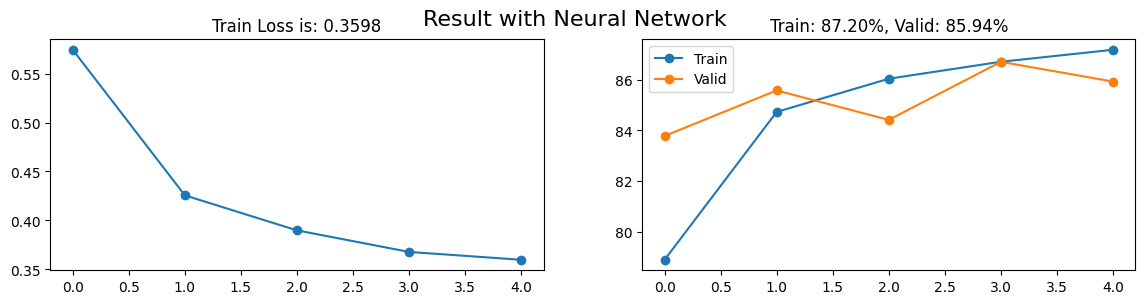

In [8]:
import matplotlib.pyplot as plt

final_loss = losses.mean(1)[-1]
final_train_acc = train_acc.mean(1)[-1]
final_valid_acc = valid_acc.mean(1)[-1]

fig, axs = plt.subplots(1, 2, figsize = (14, 3))

axs[0].plot(range(losses.shape[0]), losses.mean(1), "-o")
axs[0].set_title(f"Train Loss is: {final_loss:.4f}")


axs[1].plot(range(train_acc.shape[0]), train_acc.mean(1), "-o")
axs[1].plot(range(valid_acc.shape[0]), valid_acc.mean(1), "-o")
axs[1].set_title(f"Train: {final_train_acc:.2f}%, Valid: {final_valid_acc:.2f}%")
axs[1].legend(["Train", "Valid"])

plt.suptitle(f"Result with Neural Network", fontsize = 16)
plt.show()

Kết quả cao hơn so với simple neural network ở chương trước, xác suất dự đoán cao trên 85%. Bây giờ, hãy cùng kiểm tra để xem liệu kết quả trên tập dữ liệu kiểm tra (test set) có cao hơn so với simple neural network không.

In [9]:
x_test = test_dataset.data
y_test = test_dataset.targets

# Reshape and cast the input data
x_test = x_test.view(-1, 784)
x_test = x_test.to(torch.float32)
x_test_norm = min_max_scale(x_test)

# Cast the target labels to the 'long' data type
y_test = y_test.to(torch.long)

In [10]:
out = model.forward(x_test_norm)

test_acc = 100 * (out.argmax(1) == y_test).float().mean()

ids_error = (out.argmax(1) != y_test).nonzero()
print(f"In {len(y_test)} images, model guess wrong {len(ids_error)}")
print(f"Accuracy is: {test_acc:.2f}%")

In 10000 images, model guess wrong 1458
Accuracy is: 85.42%


Với mô hình Neural Network và sau 5 epochs, chúng ta đã đạt được độ chính xác cao hơn 85% trên tập dữ liệu kiểm tra. Đây là một bước tiến so với trên 80% của Linear Layer mà chúng ta đã đạt được trong chương trước. Điều này chỉ ra rằng Neural Network có tiềm năng mạnh mẽ hơn đối với bài toán này.

Tuy nhiên, câu hỏi đặt ra là liệu chúng ta có thể làm cho mô hình tốt hơn nữa không? Có phương pháp nào để tối ưu hóa mô hình hiện tại và nâng cao xác suất dự đoán?

Chúng ta sẽ tiếp tục khám phá những phương pháp tiên tiến trong các chương tiếp theo, bao gồm Regularization để ngăn chặn overfitting, kết hợp với sử dụng GPU để tăng tốc độ huấn luyện và cải thiện hiệu suất. Đó chính là những cách mạnh mẽ để cải thiện hiệu suất của mô hình và làm cho nó trở nên mạnh mẽ và ổn định hơn!

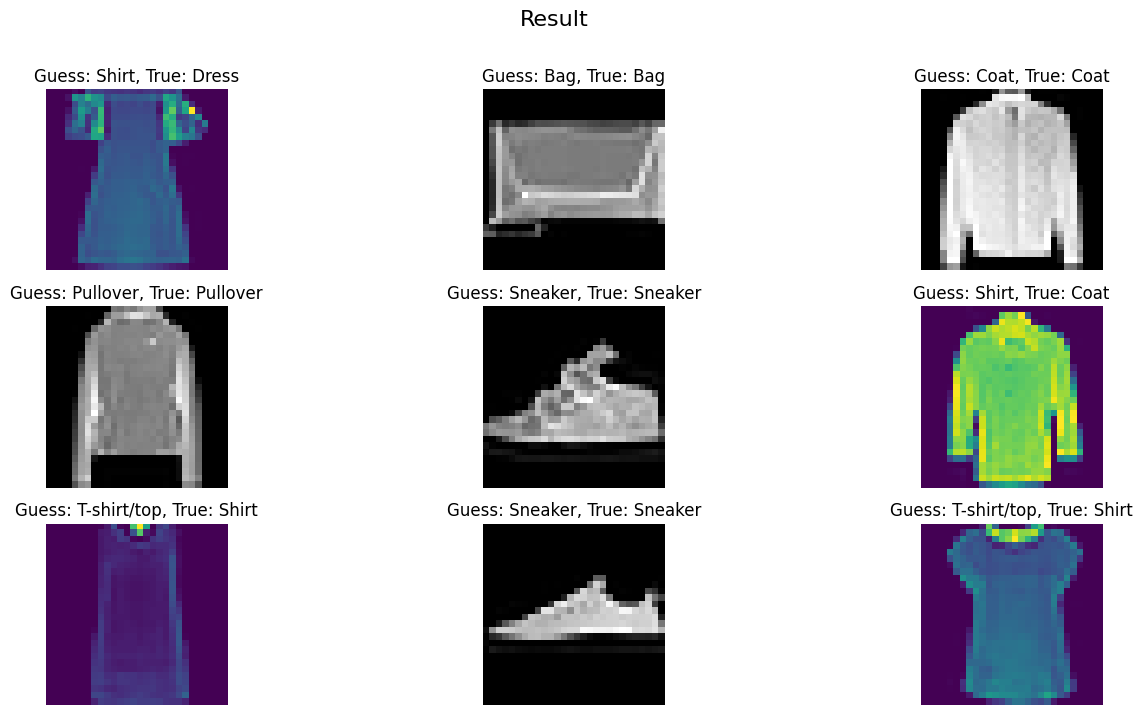

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(16, 8))

for ax in axs.flatten():
    # Select a random index from the output
    random_index = np.random.choice(len(out))
    
    # Display the image at the selected index with colormap gray for correct predictions
    true_label = y_test[random_index]
    guess_label = out.argmax(1)[random_index]
    
    if true_label == guess_label:
        ax.imshow(x_test[random_index].view(28, 28), cmap="gray")
    else:
        ax.imshow(x_test[random_index].view(28, 28))
    
    
    ax.set_title(f"Guess: {classes[guess_label]}, True: {classes[true_label]}")
    ax.axis("off")

plt.suptitle("Result", fontsize=16)
plt.show()